[-50.022837475918294, 49.92685981079897]
I learned the thing


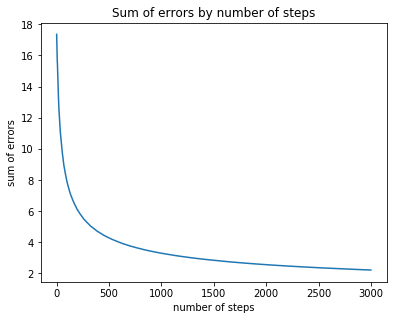

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
%matplotlib inline

# READ THE FILE AND GENERATE INPUT AND OUTPUT LISTS #

inputs=[]
o=[]

with open('pseudo_data_square.csv', newline='') as f:
    reader=csv.reader(f, delimiter='\t')
    for line in reader:
        temp_input=[float(line[0]),float(line[1])]
        inputs.append(temp_input)
        o.append(float(line[2]))
        
        
# INITIAL CONDITIONS #

weights = [0.5,0.5]
i=0
errvars=[]
errs=[]
errsum=0
errsums=[]
steps=range(3000)
numtrain=int(len(inputs)/2)

# DEFINE USEFUL FUNCTIONS #

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def errvar(x):
    return (o[i]-p)*sigmoid(inputsum)*(1-sigmoid(inputsum))*x

# EXECUTE TRAINING #

for y in steps:
    
    for i in range(numtrain):
        this_input=inputs[i]
        inputsum = np.dot(this_input,(weights))
        p=sigmoid(inputsum)
        err=0.5*(p-o[i])**2
        errs.append(err)
        
        for n in range(len(weights)):
            var=errvar(this_input[n])
            weights[n]=weights[n]+var*this_input[n]

num=int(len(errs)/numtrain)

for z in range(num):
    k=4*z
    errsum=sum(errs[k:k+numtrain])
    errsums.append(errsum)
            
print(weights)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.plot(steps,errsums)
ax.set_xlabel('number of steps')
ax.set_ylabel('sum of errors')
ax.set_title('Sum of errors by number of steps')


print("I learned the thing")

(array([  0.,   2.,   1.,   3.,   1.,   4.,   3.,   1.,   0.,   0., 225.,
          0.,   1.,   2.,   3.,   0.,   0.,   1.,   2.,   1.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

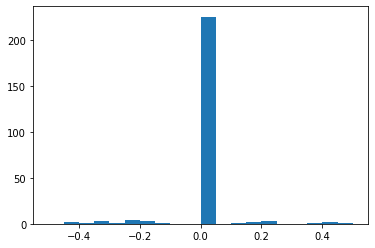

In [2]:
new_outputs=[]
predictions=[]
prediction_error=[]

for i in range(numtrain,len(inputs)):
    this_input=inputs[i]
    inputsum = np.dot(this_input,(weights))
    p=sigmoid(inputsum)
    new_outputs.append(p)
    
    
for z in new_outputs:
    if z<0.1:
        z=0
    elif z>0.9:
        z=1
    predictions.append(z)
    
for n in range(len(predictions)):
    this_prediction_error=o[numtrain+n]-predictions[n]
    prediction_error.append(this_prediction_error)

plt.hist(prediction_error, bins=20, range=(-0.5,0.5))

(array([  0.,   2.,   1.,   3.,   1.,   4.,   3.,   1.,   8., 104., 111.,
          2.,   1.,   2.,   3.,   0.,   0.,   1.,   2.,   1.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

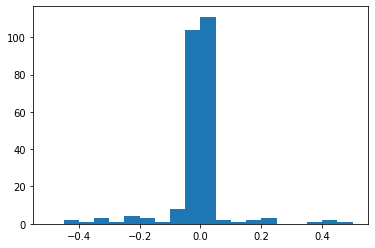

In [3]:
new_outputs=[]
prediction_error=[]

for i in range(numtrain,len(inputs)):
    this_input=inputs[i]
    inputsum = np.dot(this_input,(weights))
    p=sigmoid(inputsum)
    new_outputs.append(p)
    
for n in range(len(new_outputs)):
    this_prediction_error=o[numtrain+n]-new_outputs[n]
    prediction_error.append(this_prediction_error)

plt.hist(prediction_error, bins=20, range=(-0.5,0.5))